<a href="https://colab.research.google.com/github/Dattasai134/EDA-/blob/main/Coal_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [5]:
df = pd.read_excel('merged_data.xlsx')
df

,Date,Coal_RB_4800_FOB_London_Close_USD,Coal_RB_5500_FOB_London_Close_USD,Coal_RB_5700_FOB_London_Close_USD,Coal_RB_6000_FOB_CurrentWeek_Avg_USD,Coal_India_5500_CFR_London_Close_USD
0,2020-04-02,41.00,53.22,64.70,97.56,60.50
1,2020-04-03,40.34,52.36,63.10,70.57,62.03
2,2020-04-06,40.34,52.36,63.10,70.57,62.03
3,2020-04-07,40.34,52.36,63.10,70.57,62.03
4,2020-04-08,40.34,52.36,63.10,70.57,62.03
...,...,...,...,...,...,...
954,2023-12-22,70.35,86.36,97.18,97.99,103.44
955,2023-12-26,NaN,NaN,NaN,97.99,NaN
956,2023-12-27,70.35,86.36,97.18,97.99,103.44
957,2023-12-28,70.35,86.36,97.18,97.99,103.44


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  959 non-null    datetime64[ns]
 1   Coal_RB_4800_FOB_London_Close_USD     943 non-null    float64       
 2   Coal_RB_5500_FOB_London_Close_USD     943 non-null    float64       
 3   Coal_RB_5700_FOB_London_Close_USD     943 non-null    float64       
 4   Coal_RB_6000_FOB_CurrentWeek_Avg_USD  959 non-null    float64       
 5   Coal_India_5500_CFR_London_Close_USD  943 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 45.1 KB


In [10]:
numerical_columns = df.select_dtypes(include=np.number).columns

for column in numerical_columns:
  print(f"Column: {column}")
  print(f"Mean: {df[column].mean()}")
  print(f"Median: {df[column].median()}")
  print(f"Standard Deviation: {df[column].std()}")
  print(f"Variance: {df[column].var()}")
  print(f"Skewness: {df[column].skew()}")
  print(f"Kurtosis: {df[column].kurt()}")
  print("\n")


Column: Coal_RB_4800_FOB_London_Close_USD
Mean: 90.21852598091198
Median: 82.54
Standard Deviation: 49.88841740887055
Variance: 2488.8541915616984
Skewness: 1.1374674916999672
Kurtosis: 1.4637902372320637


Column: Coal_RB_5500_FOB_London_Close_USD
Mean: 116.56749734888655
Median: 102.56
Standard Deviation: 66.46827383206342
Variance: 4418.0314262141665
Skewness: 1.0842235514386873
Kurtosis: 0.5714051517180736


Column: Coal_RB_5700_FOB_London_Close_USD
Mean: 139.58989395546132
Median: 118.88
Standard Deviation: 81.30256988721067
Variance: 6610.107870264775
Skewness: 1.0935384715557355
Kurtosis: 0.28615082838211103


Column: Coal_RB_6000_FOB_CurrentWeek_Avg_USD
Mean: 149.99669447340983
Median: 125.44
Standard Deviation: 87.17286139325698
Variance: 7599.107763487992
Skewness: 1.0838979427444326
Kurtosis: 0.22251500403806546


Column: Coal_India_5500_CFR_London_Close_USD
Mean: 126.26086956521739
Median: 117.69
Standard Deviation: 59.65772042629305
Variance: 3559.043606461743
Skewness: 0.

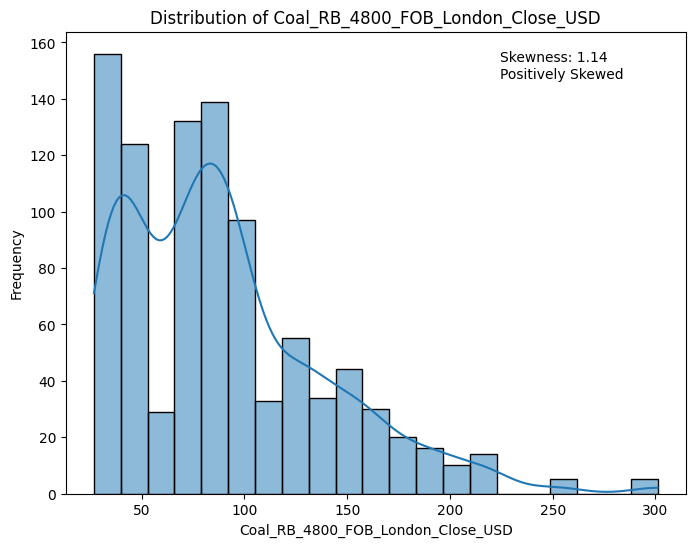

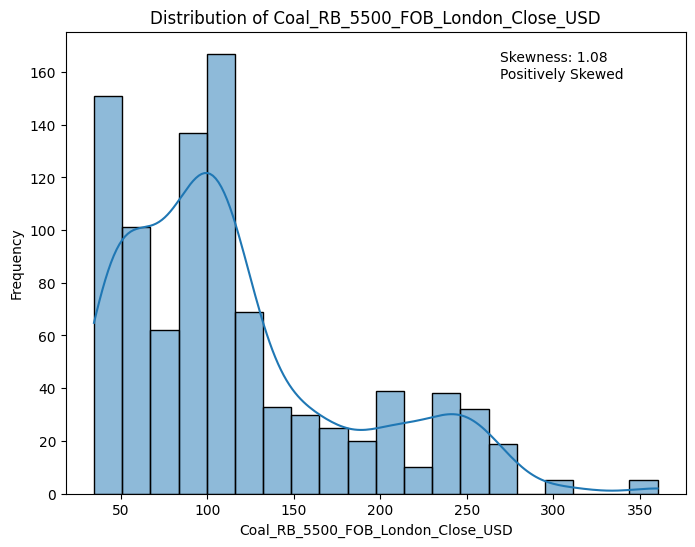

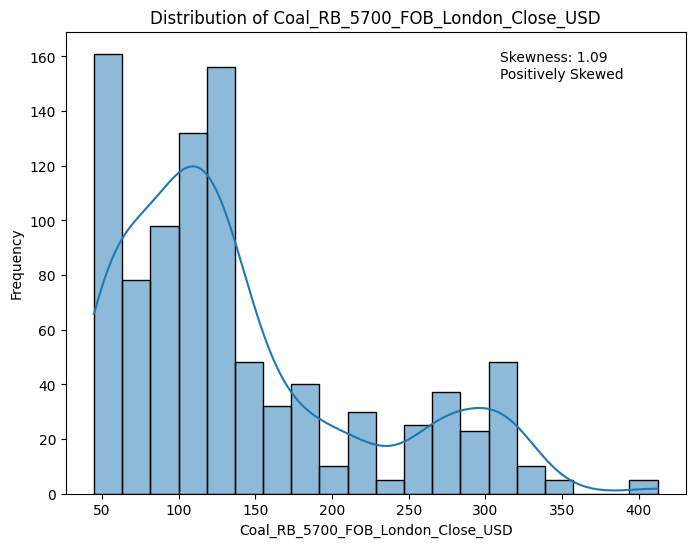

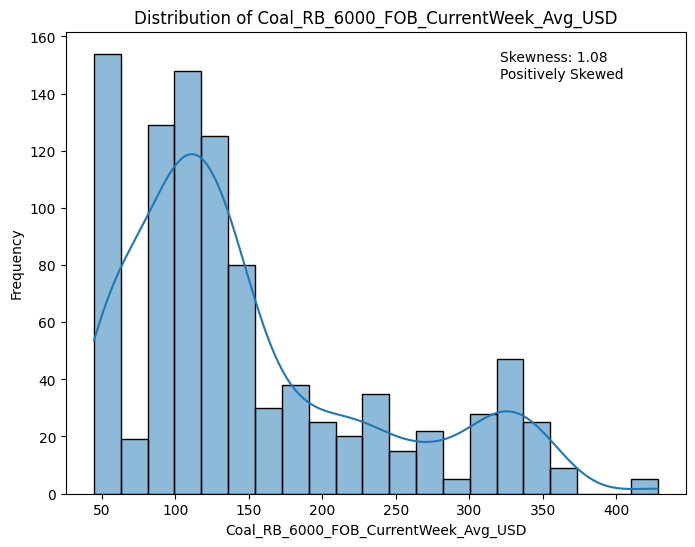

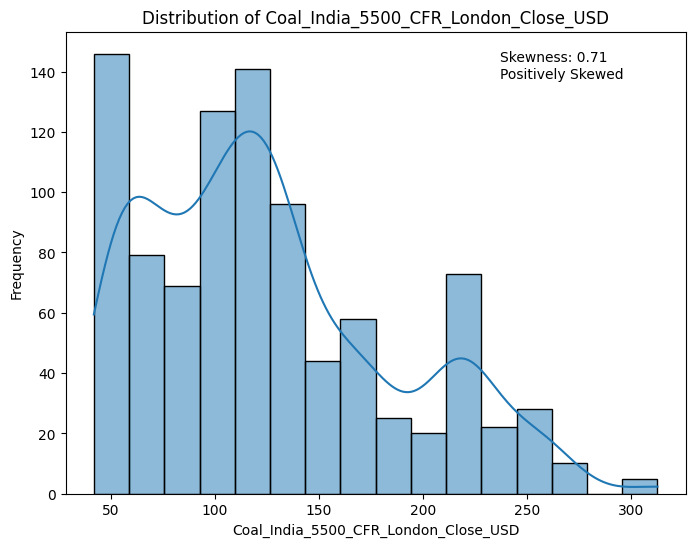

In [12]:
for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")

  skewness = df[column].skew()
  if skewness > 0:
    skew_type = "Positively Skewed"
  elif skewness < 0:
    skew_type = "Negatively Skewed"
  else:
    skew_type = "Approximately Symmetrical"

  plt.text(0.7, 0.9, f"Skewness: {skewness:.2f}\n{skew_type}", transform=plt.gca().transAxes)

  plt.show()


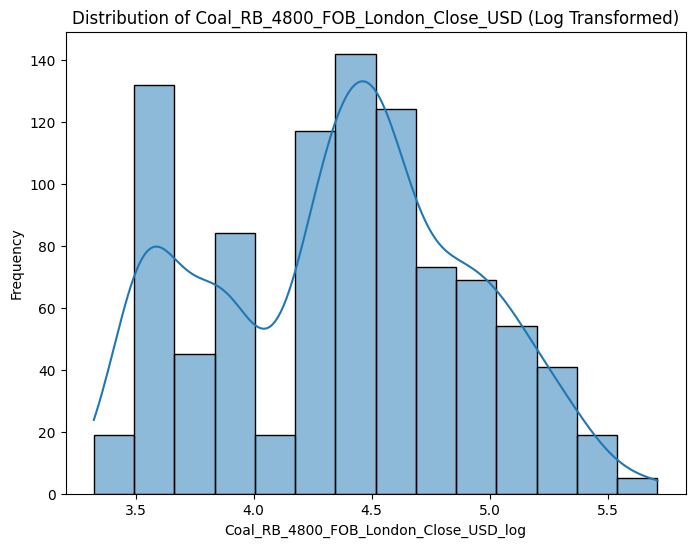

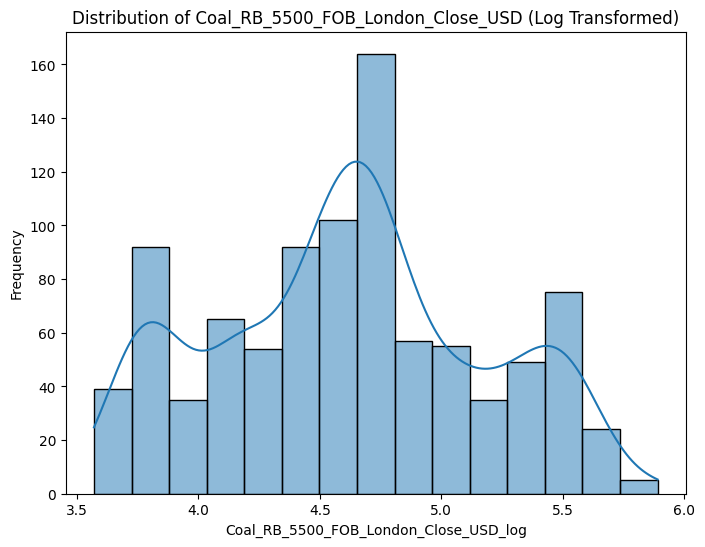

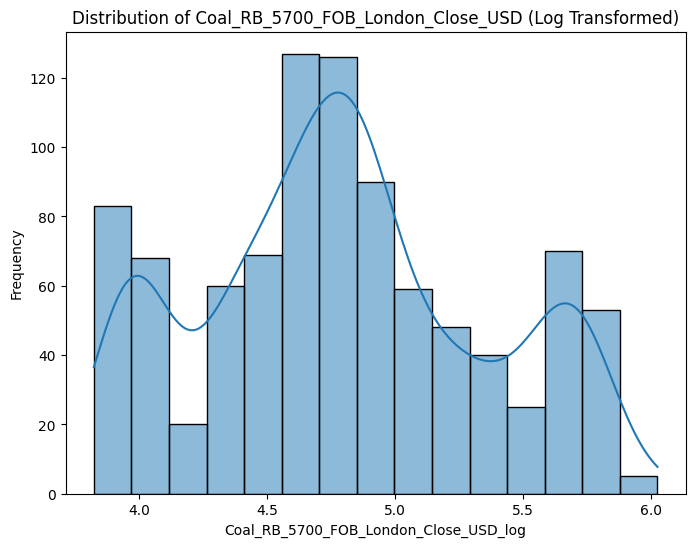

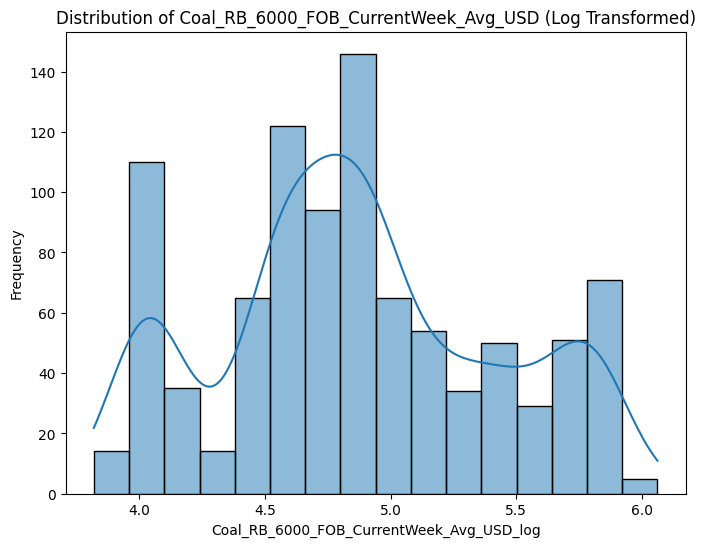

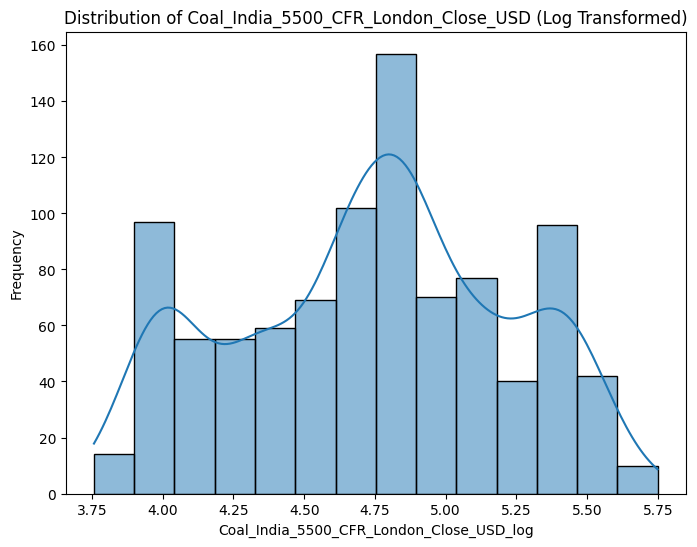

In [15]:
for column in numerical_columns:
  # Add a small constant to avoid log(0) errors
  df[column + '_log'] = np.log(df[column] + 1)

  plt.figure(figsize=(8, 6))
  sns.histplot(df[column + '_log'], kde=True)
  plt.title(f"Distribution of {column} (Log Transformed)")
  plt.xlabel(column + '_log')
  plt.ylabel("Frequency")
  plt.show()


In [16]:
df

,Date,Coal_RB_4800_FOB_London_Close_USD,Coal_RB_5500_FOB_London_Close_USD,Coal_RB_5700_FOB_London_Close_USD,Coal_RB_6000_FOB_CurrentWeek_Avg_USD,Coal_India_5500_CFR_London_Close_USD,Coal_RB_4800_FOB_London_Close_USD_log,Coal_RB_5500_FOB_London_Close_USD_log,Coal_RB_5700_FOB_London_Close_USD_log,Coal_RB_6000_FOB_CurrentWeek_Avg_USD_log,Coal_India_5500_CFR_London_Close_USD_log
0,2020-04-02,41.00,53.22,64.70,97.56,60.50,3.737670,3.993050,4.185099,4.590665,4.119037
1,2020-04-03,40.34,52.36,63.10,70.57,62.03,3.721831,3.977061,4.160444,4.270676,4.143611
2,2020-04-06,40.34,52.36,63.10,70.57,62.03,3.721831,3.977061,4.160444,4.270676,4.143611
3,2020-04-07,40.34,52.36,63.10,70.57,62.03,3.721831,3.977061,4.160444,4.270676,4.143611
4,2020-04-08,40.34,52.36,63.10,70.57,62.03,3.721831,3.977061,4.160444,4.270676,4.143611
...,...,...,...,...,...,...,...,...,...,...,...
954,2023-12-22,70.35,86.36,97.18,97.99,103.44,4.267597,4.470038,4.586803,4.595019,4.648613
955,2023-12-26,NaN,NaN,NaN,97.99,NaN,NaN,NaN,NaN,4.595019,NaN
956,2023-12-27,70.35,86.36,97.18,97.99,103.44,4.267597,4.470038,4.586803,4.595019,4.648613
957,2023-12-28,70.35,86.36,97.18,97.99,103.44,4.267597,4.470038,4.586803,4.595019,4.648613


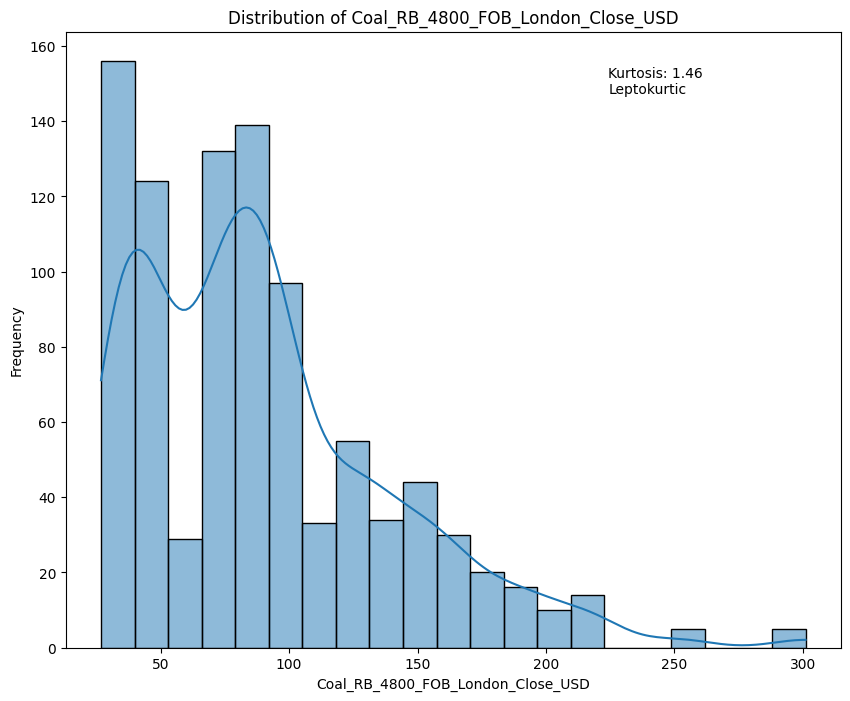

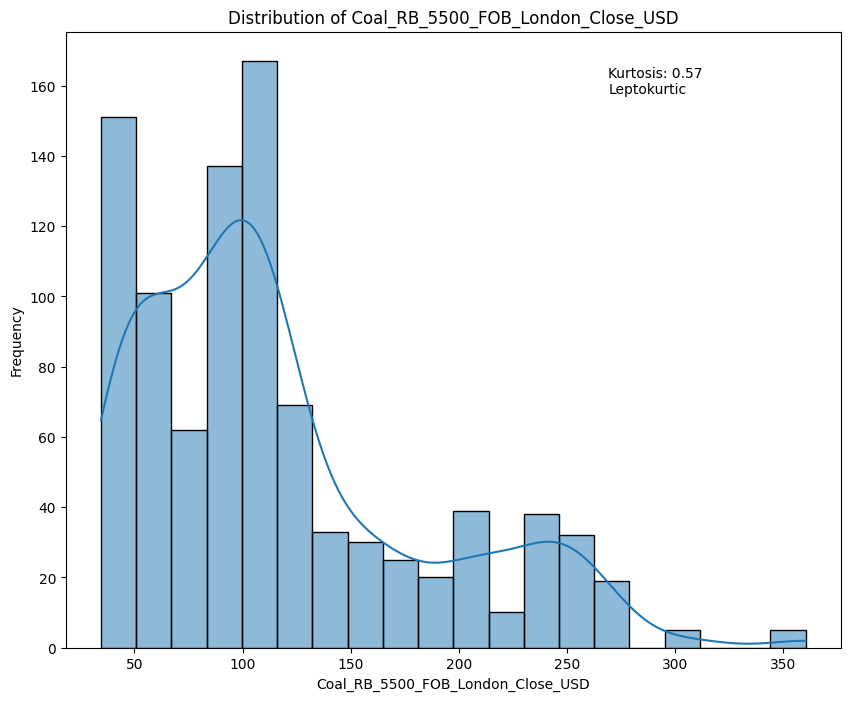

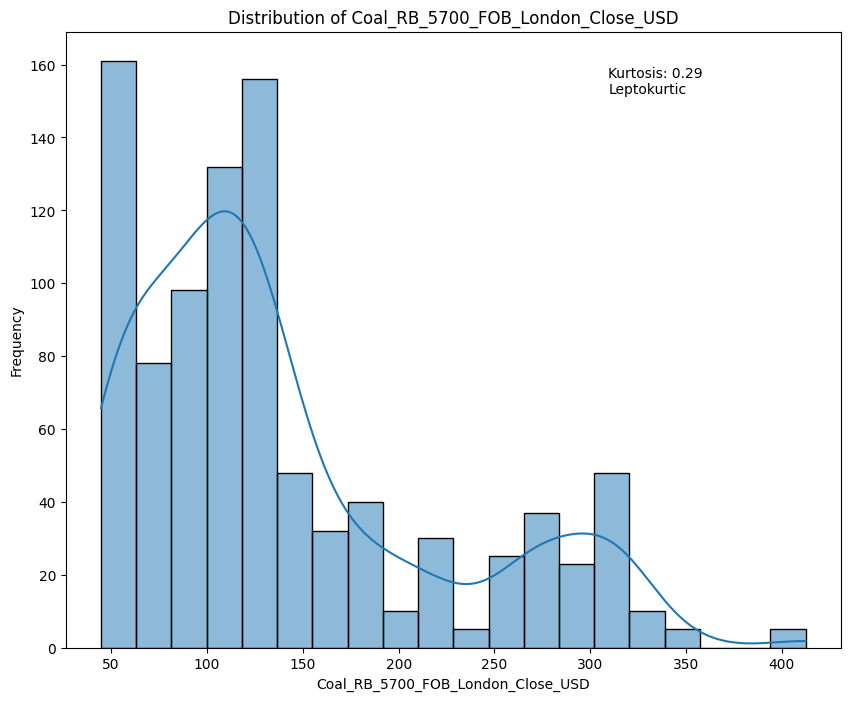

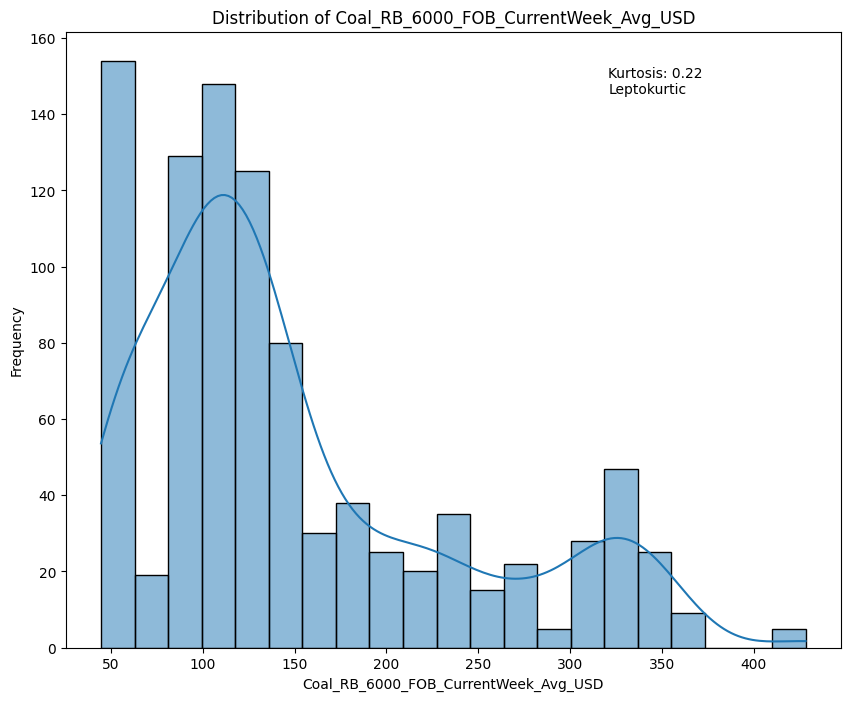

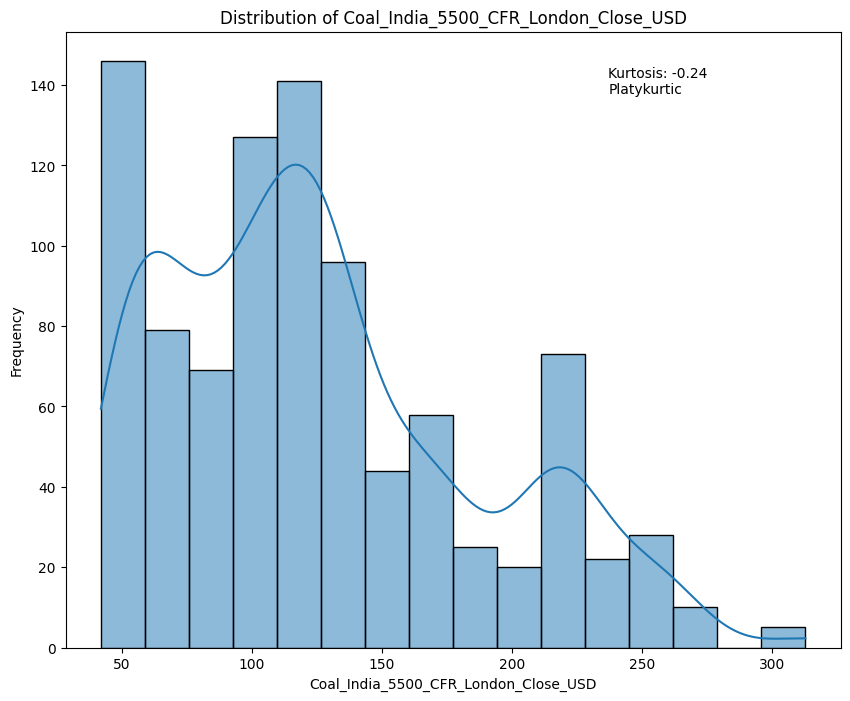

In [18]:
# Assuming 'df' and 'numerical_columns' are already defined from the preceding code

for column in numerical_columns:
  plt.figure(figsize=(10, 8))
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")

  kurtosis = df[column].kurt()
  if kurtosis > 0:
    kurt_type = "Leptokurtic"
  elif kurtosis < 0:
    kurt_type = "Platykurtic"
  else:
    kurt_type = "Mesokurtic"

  plt.text(0.7, 0.9, f"Kurtosis: {kurtosis:.2f}\n{kurt_type}", transform=plt.gca().transAxes)

  plt.show()


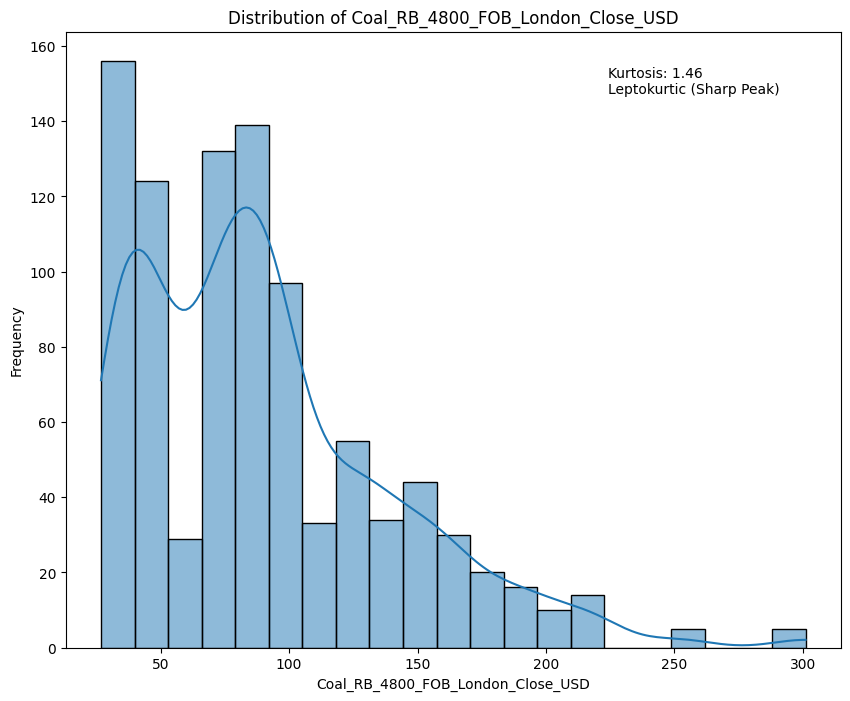

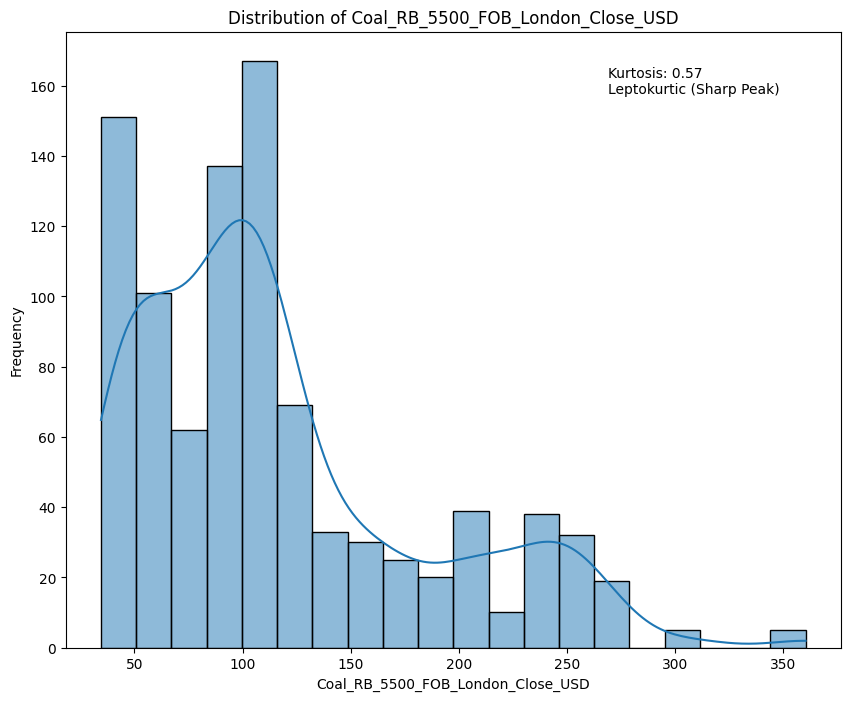

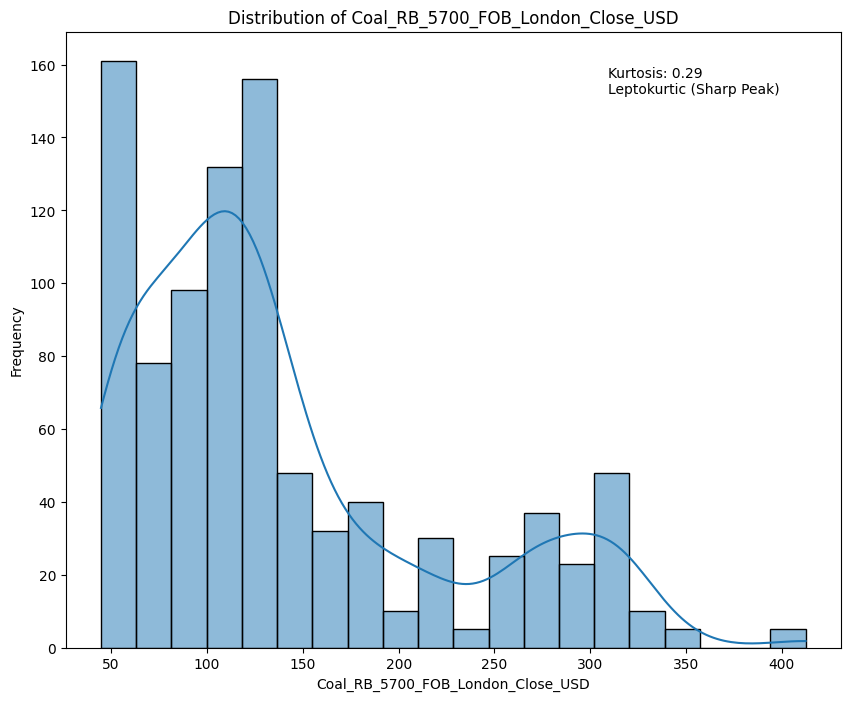

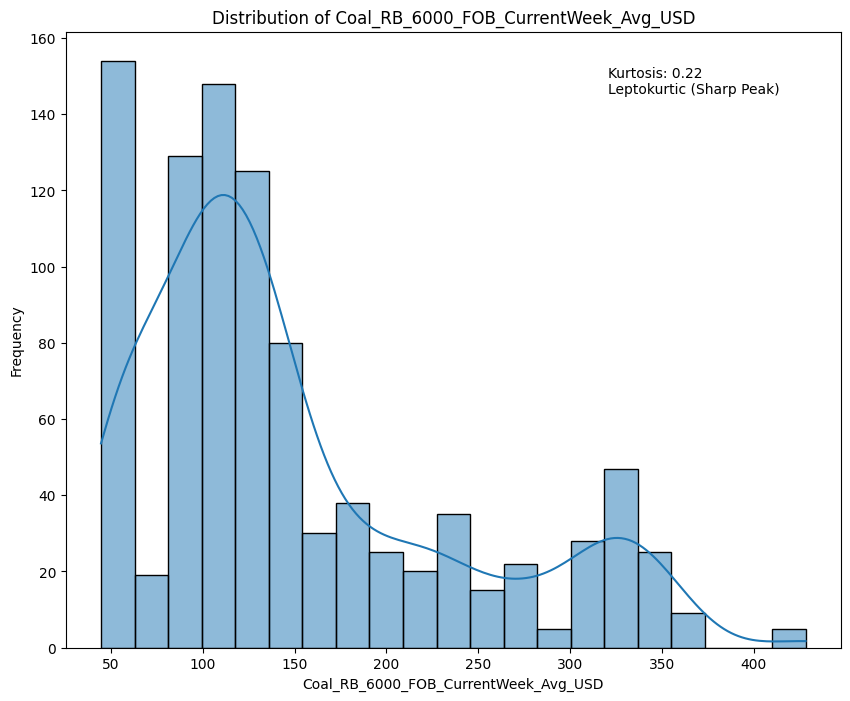

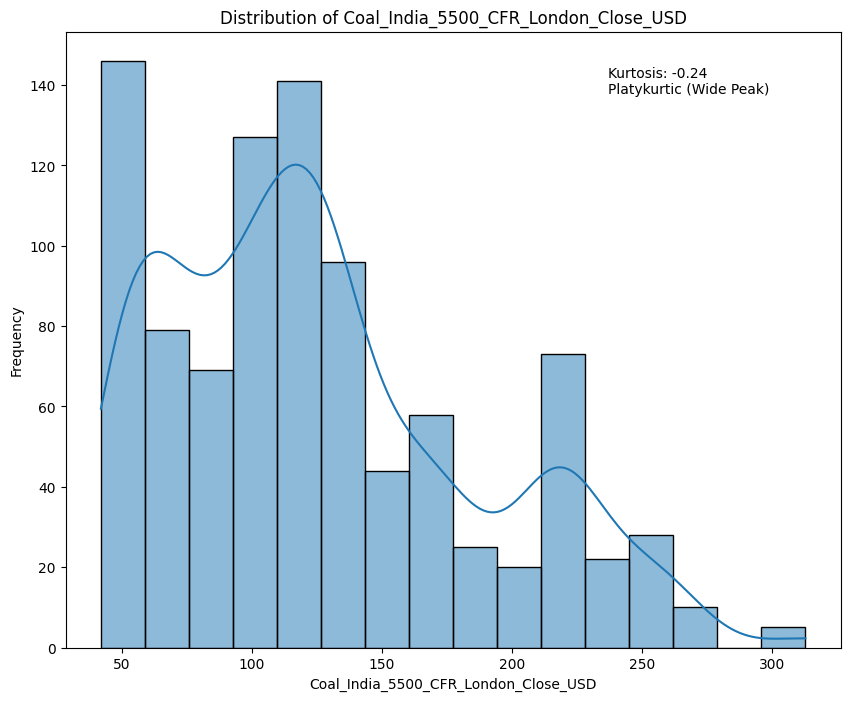

In [19]:
for column in numerical_columns:
  plt.figure(figsize=(10, 8))
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")

  kurtosis = df[column].kurt()
  if kurtosis > 0:
    kurt_type = "Leptokurtic (Sharp Peak)"  # High kurtosis indicates a sharp peak
  elif kurtosis < 0:
    kurt_type = "Platykurtic (Wide Peak)"  # Low kurtosis indicates a wide peak
  else:
    kurt_type = "Mesokurtic (Normal Peak)"

  plt.text(0.7, 0.9, f"Kurtosis: {kurtosis:.2f}\n{kurt_type}", transform=plt.gca().transAxes)

  plt.show()


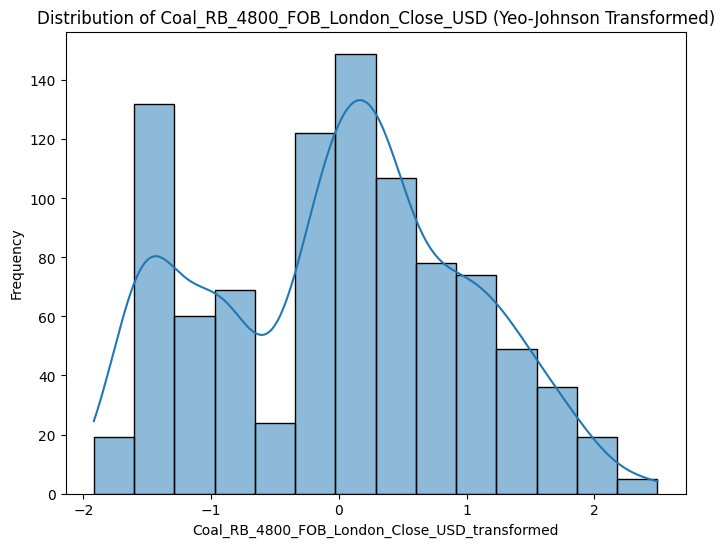

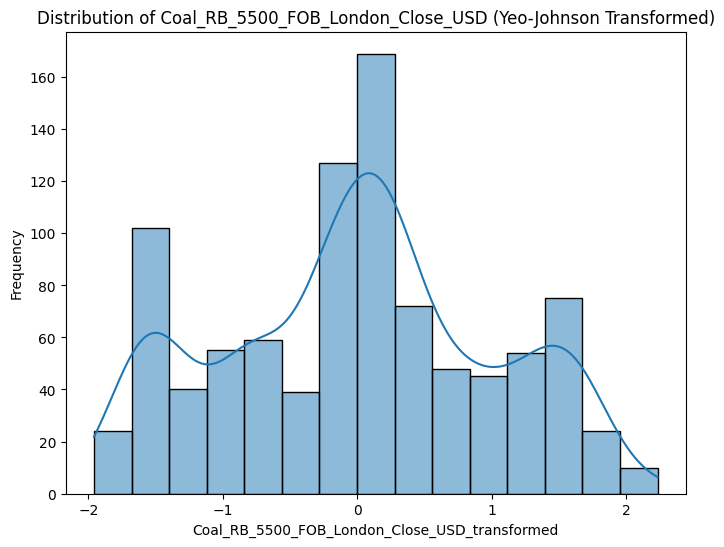

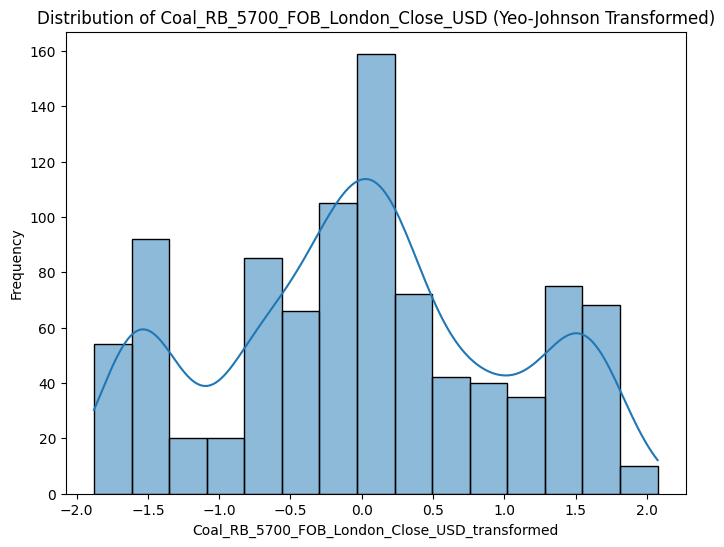

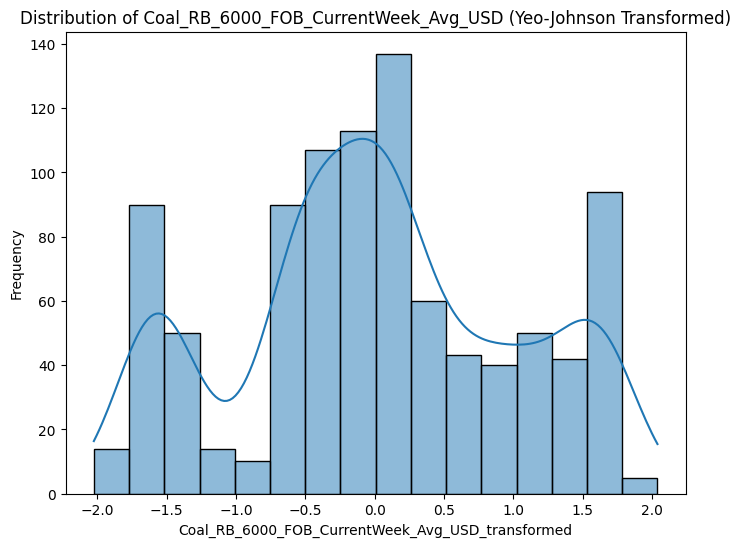

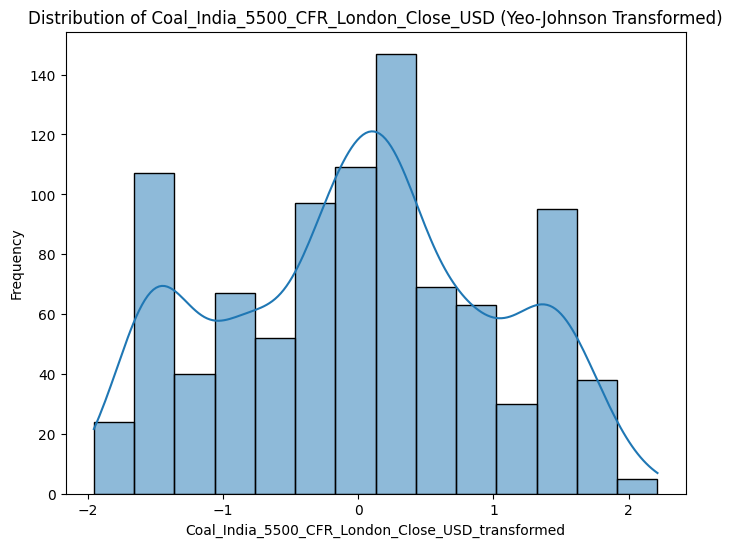

In [21]:
from sklearn.preprocessing import PowerTransformer

for column in numerical_columns:
  # Create a new column for the transformed data
  df[column + '_transformed'] = df[column]

  # Apply the Yeo-Johnson transformation
  pt = PowerTransformer(method='yeo-johnson', standardize=True)
  df[column + '_transformed'] = pt.fit_transform(df[[column + '_transformed']])

  # Visualize the transformed distribution
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column + '_transformed'], kde=True)
  plt.title(f"Distribution of {column} (Yeo-Johnson Transformed)")
  plt.xlabel(column + '_transformed')
  plt.ylabel("Frequency")
  plt.show()


In [22]:
df

,Date,Coal_RB_4800_FOB_London_Close_USD,Coal_RB_5500_FOB_London_Close_USD,Coal_RB_5700_FOB_London_Close_USD,Coal_RB_6000_FOB_CurrentWeek_Avg_USD,Coal_India_5500_CFR_London_Close_USD,Coal_RB_4800_FOB_London_Close_USD_log,Coal_RB_5500_FOB_London_Close_USD_log,Coal_RB_5700_FOB_London_Close_USD_log,Coal_RB_6000_FOB_CurrentWeek_Avg_USD_log,Coal_India_5500_CFR_London_Close_USD_log,Coal_RB_4800_FOB_London_Close_USD_transformed,Coal_RB_5500_FOB_London_Close_USD_transformed,Coal_RB_5700_FOB_London_Close_USD_transformed,Coal_RB_6000_FOB_CurrentWeek_Avg_USD_transformed,Coal_India_5500_CFR_London_Close_USD_transformed
0,2020-04-02,41.00,53.22,64.70,97.56,60.50,3.737670,3.993050,4.185099,4.590665,4.119037,-1.163640,-1.142073,-1.120411,-0.466814,-1.266942
1,2020-04-03,40.34,52.36,63.10,70.57,62.03,3.721831,3.977061,4.160444,4.270676,4.143611,-1.192572,-1.172586,-1.170373,-1.090028,-1.219083
2,2020-04-06,40.34,52.36,63.10,70.57,62.03,3.721831,3.977061,4.160444,4.270676,4.143611,-1.192572,-1.172586,-1.170373,-1.090028,-1.219083
3,2020-04-07,40.34,52.36,63.10,70.57,62.03,3.721831,3.977061,4.160444,4.270676,4.143611,-1.192572,-1.172586,-1.170373,-1.090028,-1.219083
4,2020-04-08,40.34,52.36,63.10,70.57,62.03,3.721831,3.977061,4.160444,4.270676,4.143611,-1.192572,-1.172586,-1.170373,-1.090028,-1.219083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,2023-12-22,70.35,86.36,97.18,97.99,103.44,4.267597,4.470038,4.586803,4.595019,4.648613,-0.191650,-0.248167,-0.335059,-0.458543,-0.205551
955,2023-12-26,NaN,NaN,NaN,97.99,NaN,NaN,NaN,NaN,4.595019,NaN,NaN,NaN,NaN,-0.458543,NaN
956,2023-12-27,70.35,86.36,97.18,97.99,103.44,4.267597,4.470038,4.586803,4.595019,4.648613,-0.191650,-0.248167,-0.335059,-0.458543,-0.205551
957,2023-12-28,70.35,86.36,97.18,97.99,103.44,4.267597,4.470038,4.586803,4.595019,4.648613,-0.191650,-0.248167,-0.335059,-0.458543,-0.205551


In [23]:
df.isnull().sum()

,0
Date,0
Coal_RB_4800_FOB_London_Close_USD,16
Coal_RB_5500_FOB_London_Close_USD,16
Coal_RB_5700_FOB_London_Close_USD,16
Coal_RB_6000_FOB_CurrentWeek_Avg_USD,0
Coal_India_5500_CFR_London_Close_USD,16
Coal_RB_4800_FOB_London_Close_USD_log,16
Coal_RB_5500_FOB_London_Close_USD_log,16
Coal_RB_5700_FOB_London_Close_USD_log,16
Coal_RB_6000_FOB_CurrentWeek_Avg_USD_log,0


In [24]:
# prompt: fill null values with median

for column in df.columns:
  if df[column].isnull().any():
    df[column].fillna(df[column].median(), inplace=True)


<ipython-input-24-3ac94606793b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [25]:
df.isnull().sum()

,0
Date,0
Coal_RB_4800_FOB_London_Close_USD,0
Coal_RB_5500_FOB_London_Close_USD,0
Coal_RB_5700_FOB_London_Close_USD,0
Coal_RB_6000_FOB_CurrentWeek_Avg_USD,0
Coal_India_5500_CFR_London_Close_USD,0
Coal_RB_4800_FOB_London_Close_USD_log,0
Coal_RB_5500_FOB_London_Close_USD_log,0
Coal_RB_5700_FOB_London_Close_USD_log,0
Coal_RB_6000_FOB_CurrentWeek_Avg_USD_log,0


In [26]:
# prompt: remove those columns which transformed

columns_to_remove = [col for col in df.columns if '_transformed' in col or '_log' in col]
df = df.drop(columns=columns_to_remove)
df


,Date,Coal_RB_4800_FOB_London_Close_USD,Coal_RB_5500_FOB_London_Close_USD,Coal_RB_5700_FOB_London_Close_USD,Coal_RB_6000_FOB_CurrentWeek_Avg_USD,Coal_India_5500_CFR_London_Close_USD
0,2020-04-02,41.00,53.22,64.70,97.56,60.50
1,2020-04-03,40.34,52.36,63.10,70.57,62.03
2,2020-04-06,40.34,52.36,63.10,70.57,62.03
3,2020-04-07,40.34,52.36,63.10,70.57,62.03
4,2020-04-08,40.34,52.36,63.10,70.57,62.03
...,...,...,...,...,...,...
954,2023-12-22,70.35,86.36,97.18,97.99,103.44
955,2023-12-26,82.54,102.56,118.88,97.99,117.69
956,2023-12-27,70.35,86.36,97.18,97.99,103.44
957,2023-12-28,70.35,86.36,97.18,97.99,103.44


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


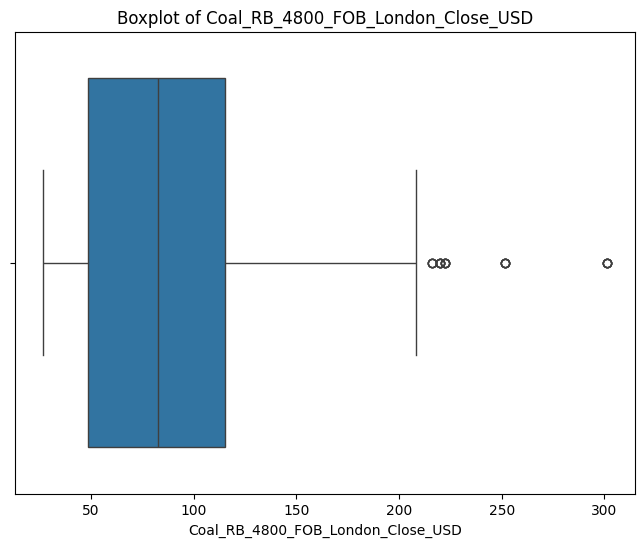

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


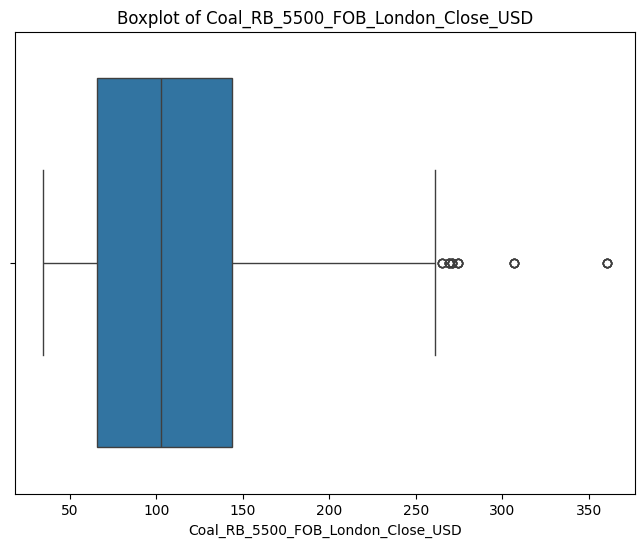

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


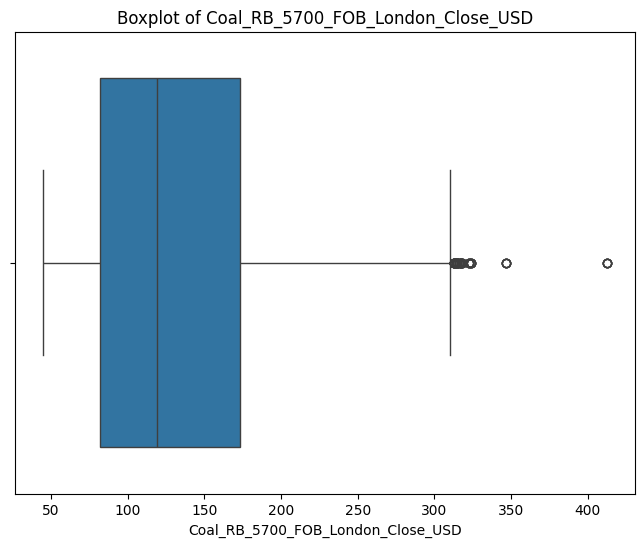

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


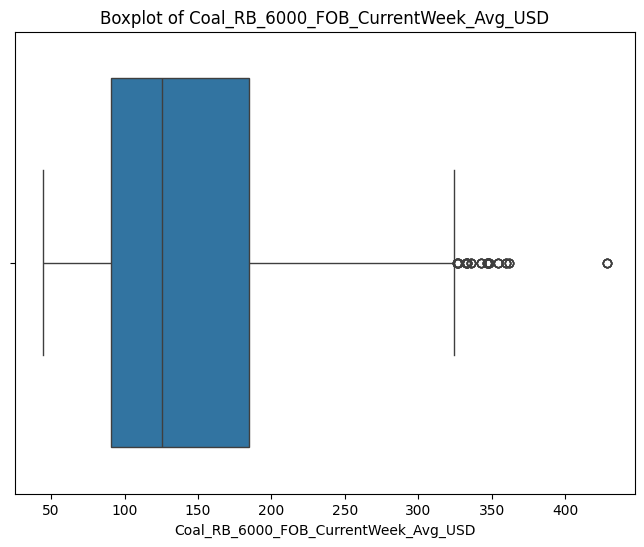

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


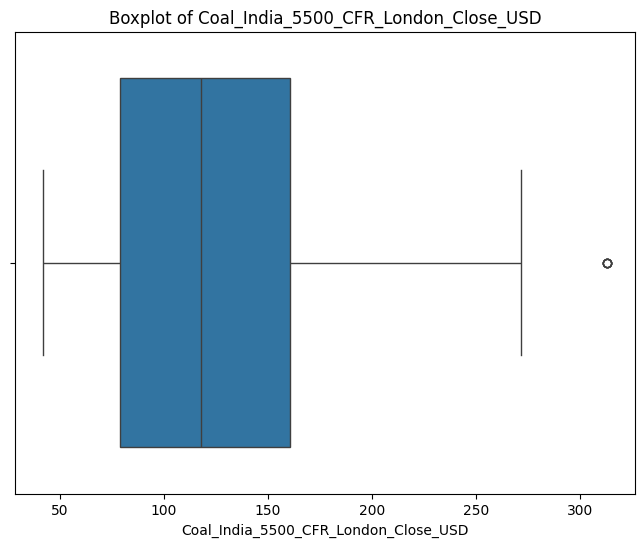

In [27]:
for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


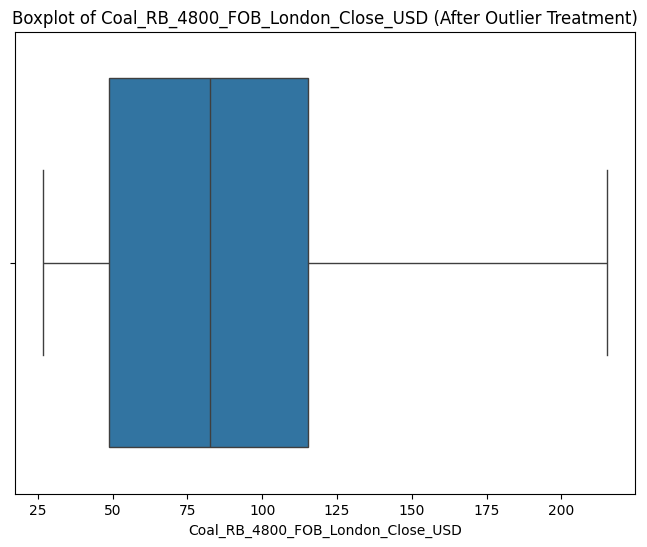

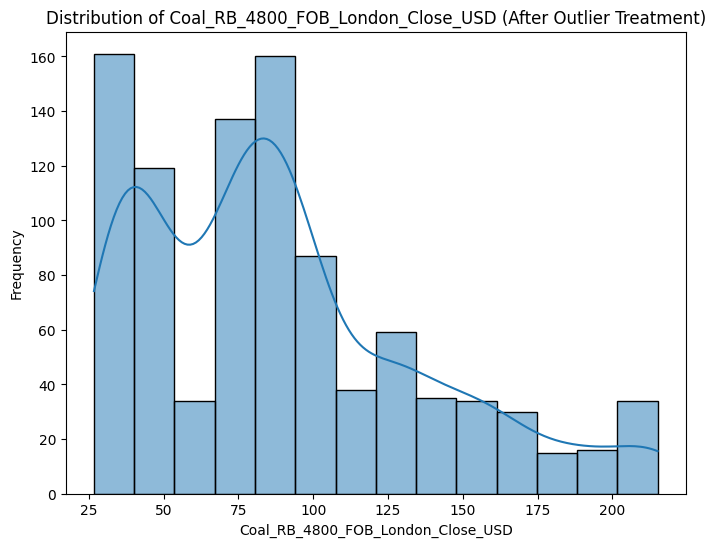

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


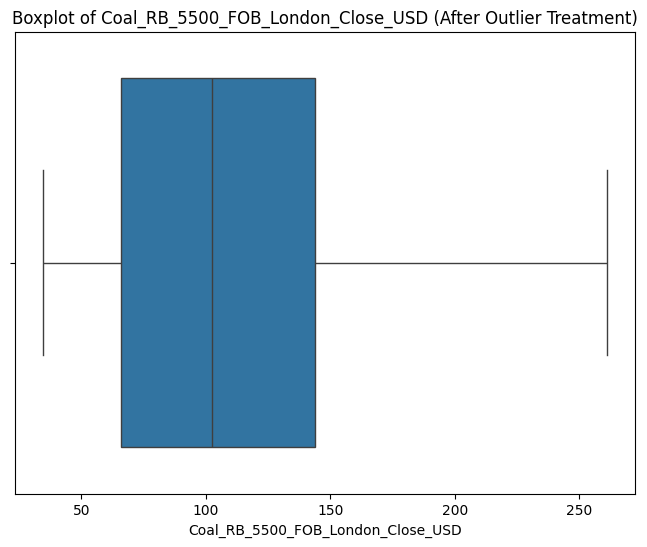

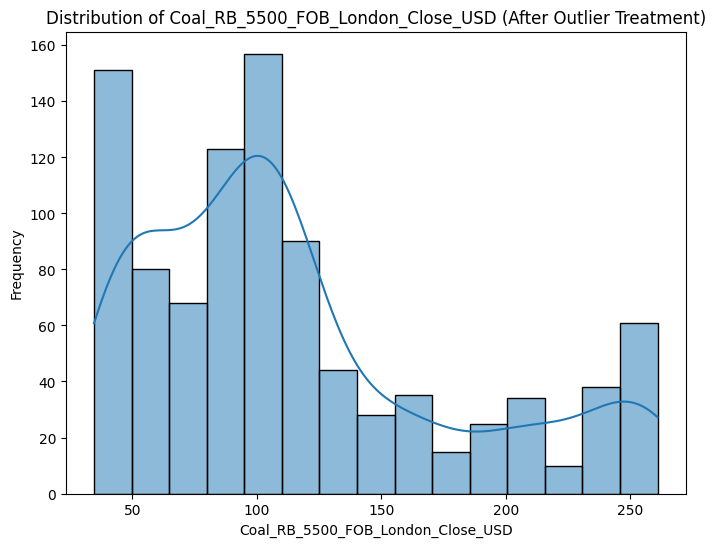

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


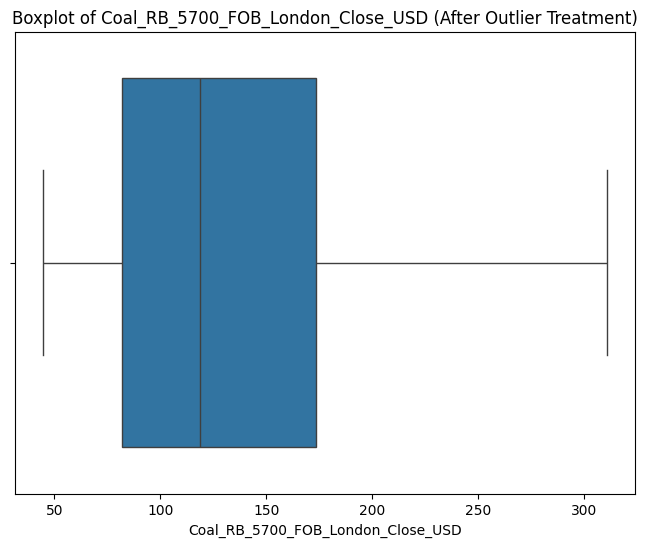

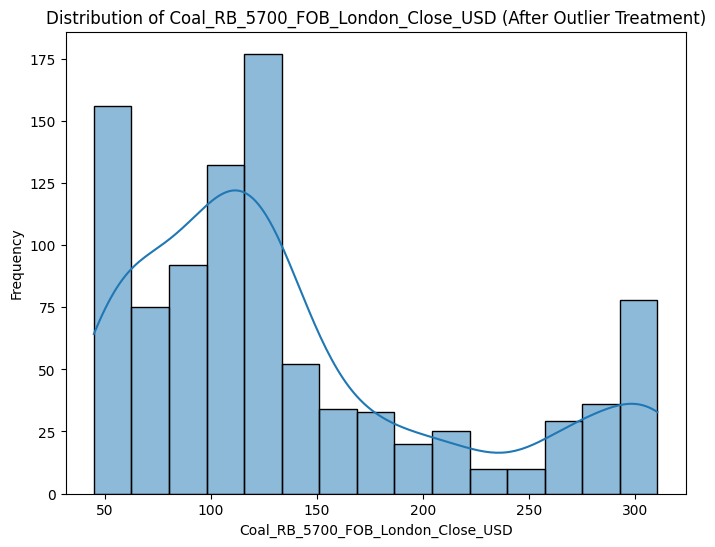

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


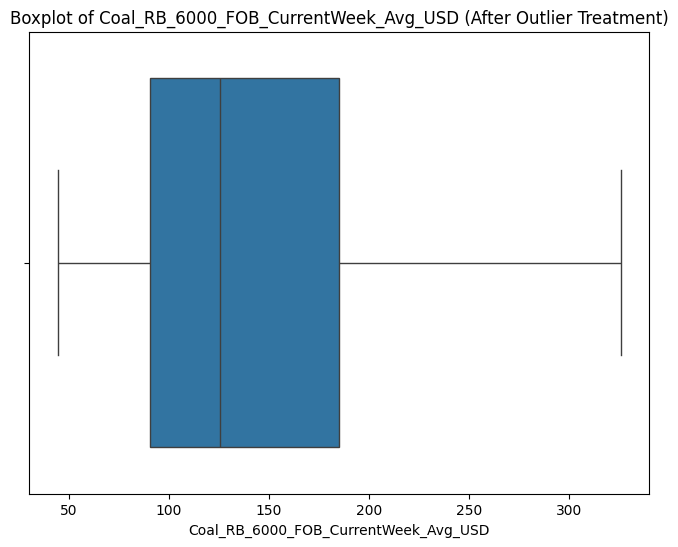

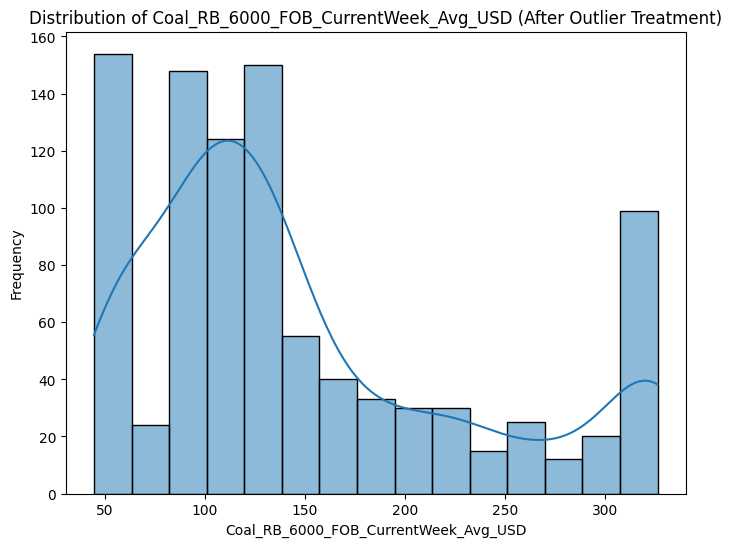

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


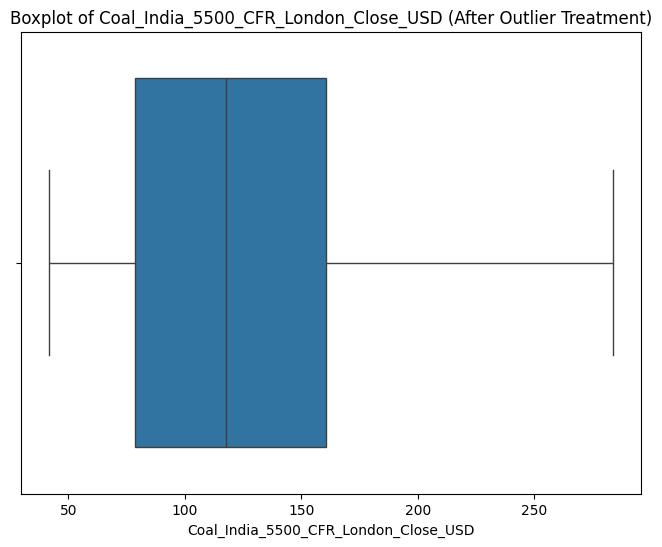

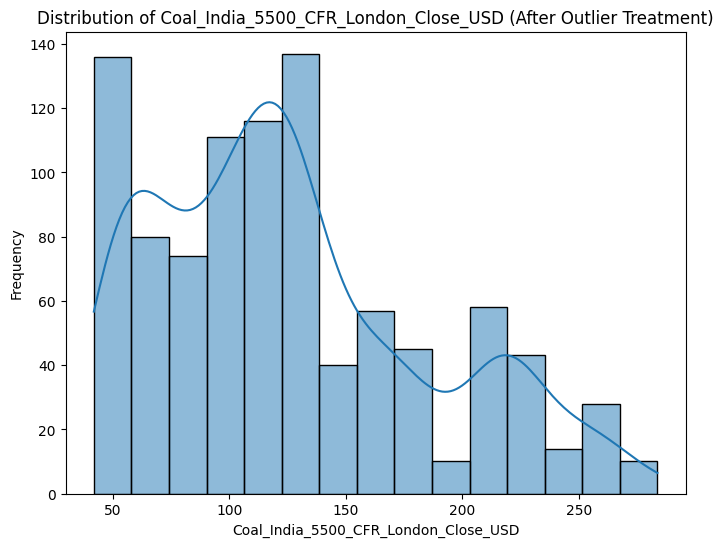

In [28]:
from scipy import stats

for column in numerical_columns:
  # Identify outliers using the IQR method
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Replace outliers with the upper or lower bound
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

  # Visualize the distribution after outlier treatment
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f"Boxplot of {column} (After Outlier Treatment)")
  plt.show()


  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column} (After Outlier Treatment)")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()


In [29]:
df

,Date,Coal_RB_4800_FOB_London_Close_USD,Coal_RB_5500_FOB_London_Close_USD,Coal_RB_5700_FOB_London_Close_USD,Coal_RB_6000_FOB_CurrentWeek_Avg_USD,Coal_India_5500_CFR_London_Close_USD
0,2020-04-02,41.00,53.22,64.70,97.56,60.50
1,2020-04-03,40.34,52.36,63.10,70.57,62.03
2,2020-04-06,40.34,52.36,63.10,70.57,62.03
3,2020-04-07,40.34,52.36,63.10,70.57,62.03
4,2020-04-08,40.34,52.36,63.10,70.57,62.03
...,...,...,...,...,...,...
954,2023-12-22,70.35,86.36,97.18,97.99,103.44
955,2023-12-26,82.54,102.56,118.88,97.99,117.69
956,2023-12-27,70.35,86.36,97.18,97.99,103.44
957,2023-12-28,70.35,86.36,97.18,97.99,103.44
